# Classificador de tumor maligno o benigno


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline # corre las graficas en cada celda para versiones menores de python
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split # dividir los datos

from sklearn.cross_validation import KFold #  cross validation
from sklearn.model_selection import GridSearchCV #  tuning parameter
# Clasificadores
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics

UsageError: unrecognized arguments: # corre las graficas en cada celda para versiones menores de python


In [ ]:
data = pd.read_csv("data_cancer.csv",header=0)

In [ ]:
data.head()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [13]:
data2=data.iloc[:,0:-1]
data2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [6]:
# borrar la columna Unnamed ya que no tiene datos utiles

data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)


In [9]:
data.drop?


Signature: data.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
Docstring:
Return new object with labels in requested axis removed.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop.
axis : int or axis name
    Whether to drop labels from the index (0 / 'index') or
    columns (1 / 'columns').
index, columns : single label or list-like
    Alternative to specifying `axis` (``labels, axis=1`` is
    equivalent to ``columns=labels``).

    .. versionadded:: 0.21.0
level : int or level name, default None
    For MultiIndex
inplace : bool, default False
    If True, do operation inplace and return None.
errors : {'ignore', 'raise'}, default 'raise'
    If 'ignore', suppress error and existing labels are dropped.

Returns
-------
dropped : type of caller

Examples
--------
>>> df = pd.DataFrame(np.arange(12).reshape(3,4),
                      columns=['A', 'B', 'C', 'D'])
>>> df
   A  B   C   D
0  0  

In [7]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
# dividimos los datos en tres categorias

features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("=================")
print(features_se)
print("==============")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [17]:
# Nuestra  columna de datos de diagnostico es del tipo objeto y la convertiremos a 0 o 1 para poder trabjar con ella
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [18]:
# Describe las funciones estadisticas basicas
data.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


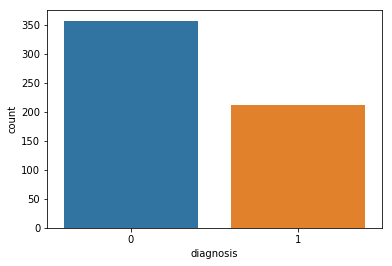

In [19]:
# frecuencia en que el cancer aparece
sns.countplot(data['diagnosis'],label="Count")


### Seleccion de caracteristicas 

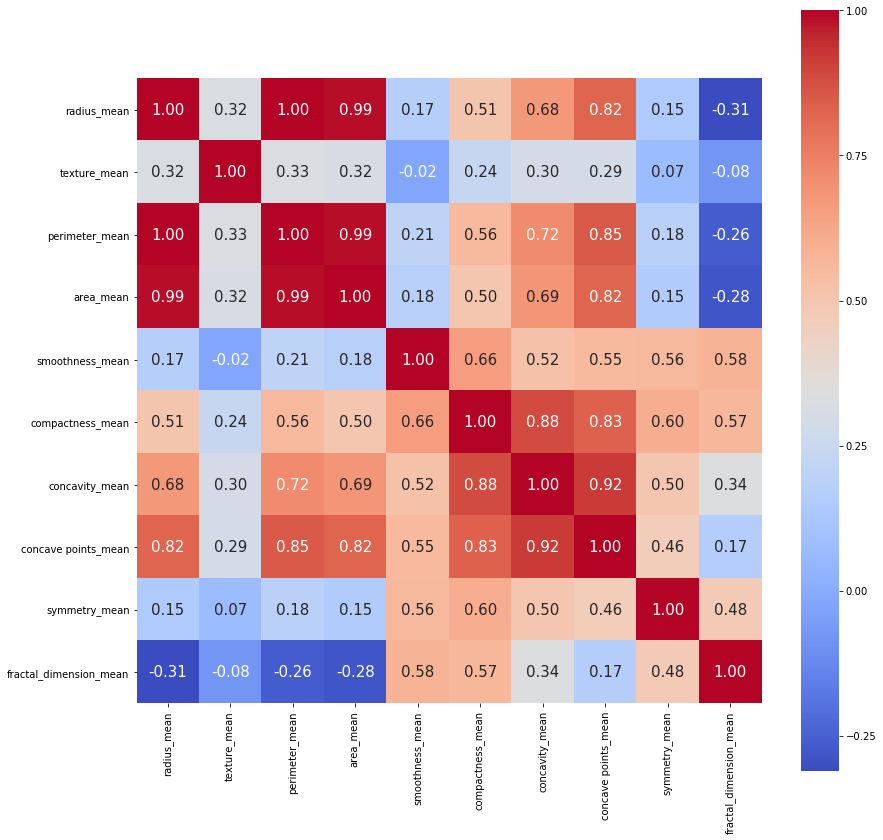

In [20]:
corr = data[features_mean].corr() # .corr es usada para obtener la correlacion
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

In [16]:
color_function = {0: "blue", 1: "red"} # Azul benigno, rojo maligno
colors = data["diagnosis"].map(lambda x: color_function.get(x)) 
pd.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15));

C:\Users\compu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  app.launch_new_instance()


In [21]:
# variables a predecir
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [22]:
# seleccionar o dividir(split) los datos para entrenar(train) y testear(test)
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [23]:
# datos a entrenar y testear 
train_X = train[prediction_var] # entrada
train_y=train.diagnosis  # salida 
# test data
test_X= test[prediction_var] # entrada
test_y =test.diagnosis # salida

In [24]:
# RandomForest 
model=RandomForestClassifier(n_estimators=100)

In [25]:
# unir
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
# predecir
prediction=model.predict(test_X)

In [27]:
# presicion de la prediccion
metrics.accuracy_score(prediction,test_y)

0.92397660818713445

C:\Users\compu\Anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


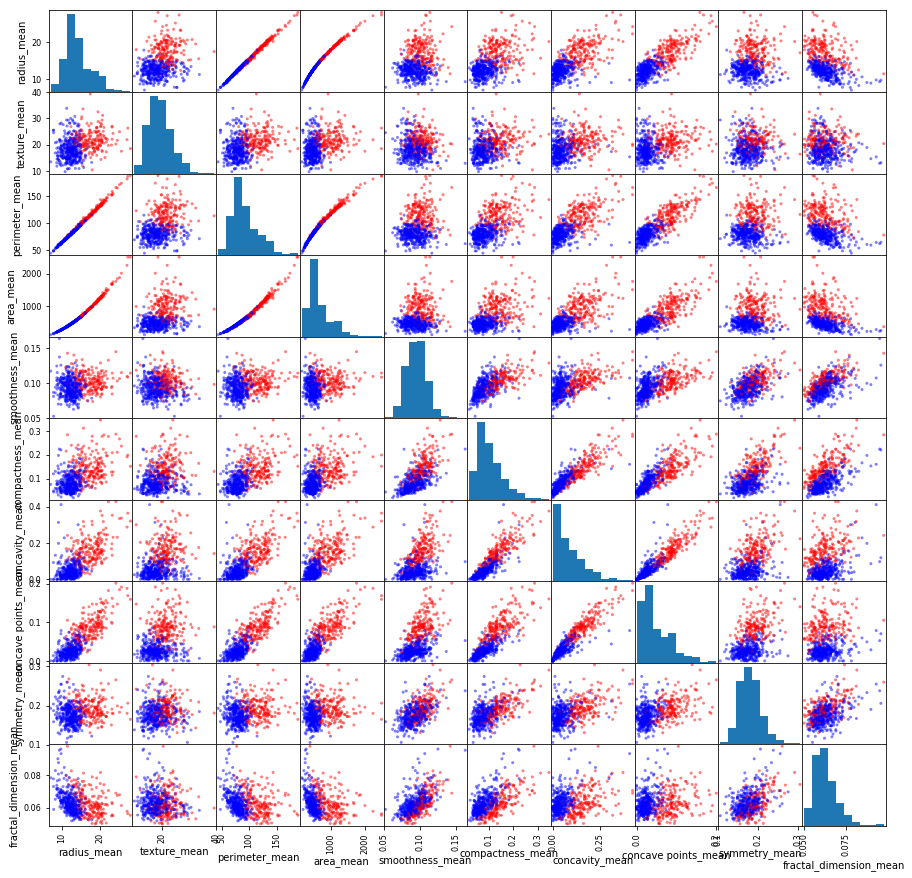

In [28]:
color_function = {0: "blue", 1: "red"} # Azul benigno, rojo maligno
colors = data["diagnosis"].map(lambda x: color_function.get(x)) 
pd.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15));

In [18]:
diabetes=pd.read_csv('diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
